## Getting Heartrate and Meditation Data

***NOTE - Headspace and a wearable device must be synced with Apple Health app in order to pull this data**

In order to get the raw export, go into the “Apple Health” app, tap on your user icon and then select **“Export Health Data”**. This export process may take a few minutes, and, once completed, you should then have a filed called “export.zip”. You can share the file with yourself via AirDrop, Email or any other method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET

In [2]:
#allow all columns to be seen. 
pd.set_option('display.max_columns', None)

# Source:https://stackoverflow.com/questions/47022070/display-all-dataframe-columns-in-a-jupyter-python-notebook/47022213 

# Format the Apple Health XML file

#### Creating the Dataframe

In [3]:
tree = ET.parse('export.xml')
root = tree.getroot()

#Reference Docs: https://docs.python.org/3/library/xml.etree.elementtree.html

In [4]:
df = pd.DataFrame([child.attrib for child in root])
df.head()

,value,HKCharacteristicTypeIdentifierDateOfBirth,HKCharacteristicTypeIdentifierBiologicalSex,HKCharacteristicTypeIdentifierBloodType,HKCharacteristicTypeIdentifierFitzpatrickSkinType,HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,device,workoutActivityType,duration,durationUnit,totalDistance,totalDistanceUnit,totalEnergyBurned,totalEnergyBurnedUnit
0,2020-12-01 18:59:42 -0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,,HKBiologicalSexNotSet,HKBloodTypeNotSet,HKFitzpatrickSkinTypeNotSet,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,193,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierBodyMass,Orangetheory,1,lb,2020-01-03 18:16:18 -0500,2020-01-03 18:16:18 -0500,2020-01-03 18:16:18 -0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,193,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierBodyMass,Orangetheory,1,lb,2020-01-07 02:00:23 -0500,2020-01-07 02:00:23 -0500,2020-01-07 02:00:23 -0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,193,NaN,NaN,NaN,NaN,NaN,HKQuantityTypeIdentifierBodyMass,Orangetheory,1,lb,2020-01-11 14:24:53 -0500,2020-01-11 14:24:53 -0500,2020-01-11 14:24:53 -0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(104137, 21)

### Clean the Dataframe to only have Heartrate and Meditation Data

In [6]:
df['sourceName'].value_counts() #count of each sourceName

Josh’s Iphone    74620
Connect          27235
Peloton           1160
Strava             333
Orangetheory       327
Clock              278
Headspace          152
Jour                29
Health               1
Name: sourceName, dtype: int64

#### Filter to sources of Connect (my Garmin watch), Headspace, and only heartrate data

In [8]:
df = df[((df['sourceName'] == "Connect") & (df["type"] == "HKQuantityTypeIdentifierHeartRate")) | (df['sourceName'] == "Headspace")].copy()

#### Drop unnecessary columns

In [16]:
df.drop(columns=['HKCharacteristicTypeIdentifierDateOfBirth',
       'HKCharacteristicTypeIdentifierBiologicalSex',
       'HKCharacteristicTypeIdentifierBloodType',
       'HKCharacteristicTypeIdentifierFitzpatrickSkinType',
       'HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse', 'sourceVersion','creationDate',
       'device', 'workoutActivityType', 'duration', 'durationUnit',
       'totalDistance', 'totalDistanceUnit', 'totalEnergyBurned',
       'totalEnergyBurnedUnit'], inplace=True)

#### Check the data types

In [18]:
df.dtypes

value         object
type          object
sourceName    object
unit          object
startDate     object
endDate       object
dtype: object

In [20]:
#Convert datatypes
df['value'] = df.value.astype(float)
df['startDate'] = pd.to_datetime(df['startDate'])
df['endDate'] = pd.to_datetime(df['endDate'])

In [23]:
df.dtypes

value                                        float64
type                                          object
sourceName                                    object
unit                                          object
startDate     datetime64[ns, pytz.FixedOffset(-300)]
endDate       datetime64[ns, pytz.FixedOffset(-300)]
dtype: object

## Export Data as a .CSV

In [26]:
df.to_csv('clean_data.csv',index=False)

# Exploratory Data Analysis

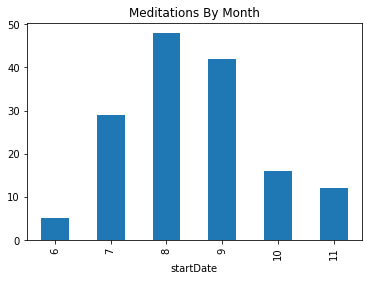

In [170]:
df[df['sourceName'] == 'Headspace']['startDate'].groupby(df.startDate.dt.month).agg('count').plot(title='Meditations By Month',kind='bar');

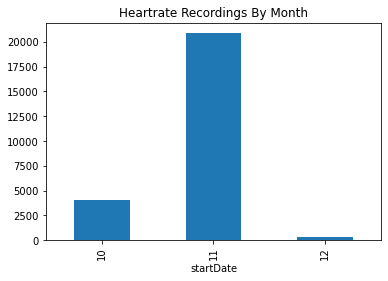

In [172]:
df[df['sourceName'] == 'Connect']['startDate'].groupby(df.startDate.dt.month).agg('count').plot(title='Heartrate Recordings By Month',
                                                                                                kind='bar');

#### We will be investigating the month of November since we have incomplete Heartrate data for the other months in the analysis

In [152]:
nov = df[(df['startDate'] >= '2020-11-01') & (df['startDate'] < '2020-12-01')].copy()
nov.head()

,value,type,sourceName,unit,startDate,endDate
4091,94.0,HKQuantityTypeIdentifierHeartRate,Connect,count/min,2020-11-01 23:58:00-05:00,2020-11-01 23:58:00-05:00
4092,66.0,HKQuantityTypeIdentifierHeartRate,Connect,count/min,2020-11-01 23:56:00-05:00,2020-11-01 23:56:00-05:00
4093,64.0,HKQuantityTypeIdentifierHeartRate,Connect,count/min,2020-11-01 23:54:00-05:00,2020-11-01 23:54:00-05:00
4094,60.0,HKQuantityTypeIdentifierHeartRate,Connect,count/min,2020-11-01 23:52:00-05:00,2020-11-01 23:52:00-05:00
4095,63.0,HKQuantityTypeIdentifierHeartRate,Connect,count/min,2020-11-01 23:50:00-05:00,2020-11-01 23:50:00-05:00


In [153]:
nov.shape

(20910, 6)

### Create a function to add a `headspace_session` column for Headspace meditations

In [154]:
def addSessions(dataframe):
    sessions = [] #create a list to store the session numbers
    session_count = 0 #create a counter for sessions

    for source in dataframe['sourceName']:
        if source == 'Headspace':
            session_count += 1
            sessions.append(session_count)
        else:
            sessions.append(0) #if Connect, set session as 0
    
    return sessions
    

In [155]:
#Add a column called headspace_session

nov['headspace_session'] = addSessions(nov)

In [156]:
nov[nov['sourceName'] == 'Headspace']

,value,type,sourceName,unit,startDate,endDate,headspace_session
103423,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-04 13:27:25-05:00,2020-11-04 13:36:21-05:00,1
103424,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-04 21:56:14-05:00,2020-11-04 21:59:16-05:00,2
103425,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-09 00:12:38-05:00,2020-11-09 00:24:08-05:00,3
103426,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-10 16:49:36-05:00,2020-11-10 16:56:38-05:00,4
103427,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-11 01:35:05-05:00,2020-11-11 01:46:35-05:00,5
103428,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-16 14:39:35-05:00,2020-11-16 14:41:38-05:00,6
103429,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-16 14:42:00-05:00,2020-11-16 14:49:57-05:00,7
103430,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-19 02:36:28-05:00,2020-11-19 02:38:43-05:00,8
103431,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-24 01:59:39-05:00,2020-11-24 02:02:40-05:00,9
103432,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-24 23:46:54-05:00,2020-11-24 23:56:40-05:00,10


### Link the Connect Heartrate data to a `headspace_session`


In [157]:
#create a dataframe of just the headspace sessions
headspace_sessions = nov[nov['sourceName'] == 'Headspace'].copy()

In [158]:
headspace_sessions

,value,type,sourceName,unit,startDate,endDate,headspace_session
103423,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-04 13:27:25-05:00,2020-11-04 13:36:21-05:00,1
103424,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-04 21:56:14-05:00,2020-11-04 21:59:16-05:00,2
103425,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-09 00:12:38-05:00,2020-11-09 00:24:08-05:00,3
103426,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-10 16:49:36-05:00,2020-11-10 16:56:38-05:00,4
103427,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-11 01:35:05-05:00,2020-11-11 01:46:35-05:00,5
103428,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-16 14:39:35-05:00,2020-11-16 14:41:38-05:00,6
103429,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-16 14:42:00-05:00,2020-11-16 14:49:57-05:00,7
103430,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-19 02:36:28-05:00,2020-11-19 02:38:43-05:00,8
103431,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-24 01:59:39-05:00,2020-11-24 02:02:40-05:00,9
103432,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-24 23:46:54-05:00,2020-11-24 23:56:40-05:00,10


In [159]:
linked_session = []                                                                              #create a list to save the sessions

for row in nov.itertuples():                                                                     #for every row in november
    session_matches = []
    for session in headspace_sessions.itertuples():                                              #loop through the headspace sessions
        if (row[5] >= session[5]) and (row[5] <= session[6] and (row[3] == 'Connect')):          #if the heartrate data is inbetween a headspace session
            session_matches.append(session[-1])                                                  #append the session
        else:
            session_matches.append(0)                                                            #append 0 if the heartrate period does not match a headspace session
    
    linked_session.append(sum(session_matches))                        

#### Create a new column called `linked_session`

In [160]:
nov['linked_session'] = linked_session

In [161]:
nov

,value,type,sourceName,unit,startDate,endDate,headspace_session,linked_session
4091,94.0,HKQuantityTypeIdentifierHeartRate,Connect,count/min,2020-11-01 23:58:00-05:00,2020-11-01 23:58:00-05:00,0,0
4092,66.0,HKQuantityTypeIdentifierHeartRate,Connect,count/min,2020-11-01 23:56:00-05:00,2020-11-01 23:56:00-05:00,0,0
4093,64.0,HKQuantityTypeIdentifierHeartRate,Connect,count/min,2020-11-01 23:54:00-05:00,2020-11-01 23:54:00-05:00,0,0
4094,60.0,HKQuantityTypeIdentifierHeartRate,Connect,count/min,2020-11-01 23:52:00-05:00,2020-11-01 23:52:00-05:00,0,0
4095,63.0,HKQuantityTypeIdentifierHeartRate,Connect,count/min,2020-11-01 23:50:00-05:00,2020-11-01 23:50:00-05:00,0,0
...,...,...,...,...,...,...,...,...
103430,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-19 02:36:28-05:00,2020-11-19 02:38:43-05:00,8,0
103431,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-24 01:59:39-05:00,2020-11-24 02:02:40-05:00,9,0
103432,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-24 23:46:54-05:00,2020-11-24 23:56:40-05:00,10,0
103433,NaN,HKCategoryTypeIdentifierMindfulSession,Headspace,NaN,2020-11-29 01:31:47-05:00,2020-11-29 01:43:17-05:00,11,0


# Export to a .CSV

In [163]:
nov.to_csv('nov_data.csv',index=False)